#**Back Propagation**

#Step 1 : import libraries

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#Step 2 :Load the Dataset
###Upload palmer penguins dataset " / LAB/ Dataset/ penguins.csv





In [75]:
# Loading dataset
df = sns.load_dataset('penguins')

# Dividing the dataset into target variable and features
X = df.drop('species', axis=1)  # Features
y = df['species']  # Target variable
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [76]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [77]:
df.dropna(inplace=True)
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [78]:
y_train_encoded = le.fit_transform(y_train)


In [88]:
le = LabelEncoder()
X['island'] = le.fit_transform(X['island'])
X['sex'] = le.fit_transform(X['sex'])


In [89]:
y = le.fit_transform(y)

In [90]:
df.shape

(333, 7)

In [91]:
y.shape

(344,)

In [92]:
X_train.shape, y_train.shape

((324, 6), (324,))

#Step 3: Split Dataset in Training and Testing


In [93]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)


# Step 4 : initializing the hyperparameters

In [94]:
# Hyperparameters
learning_rate = 0.01
num_iterations = 1000
N = y_train.size
# Input features
input_size = 6
# Hidden layers
hidden_size = 4
# Output layer
output_size = 3

#Step 5 : Initialize Weights

In [95]:
np.random.seed(10)
# Hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
# Output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))


#Step 6 : mean squared error, accuracy and sigmoid.



In [96]:
# Helper functions


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    # One-hot encode y_true (i.e., convert [0, 1, 2] into [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    y_true_one_hot = np.eye(output_size)[y_true]

    # Reshape y_true_one_hot to match y_pred shape
    y_true_reshaped = y_true_one_hot.reshape(y_pred.shape)

    # Compute the mean squared error between y_pred and y_true_reshaped
    error = ((y_pred - y_true_reshaped)**2).sum() / (2*y_pred.size)

    return error

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) ==  y_true.argmax(axis=1)
    return acc.mean()

results = pd.DataFrame(columns=["mse", "accuracy"])
print(np.unique(y_train))

[0 1 2]


#Step 7 : Building the Backpropogation Model in Python
###We will create a for loop for a given number of iterations and will update the weights in each iteration. The model will go through three phases feedforward propagation, the error calculation phase, and the backpropagation phase.


In [97]:
# Training loop
for itr in range(num_iterations):
    # Feedforward propagation
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Calculate error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(np.eye(output_size)[y_train], A2)
    new_row = pd.DataFrame({"mse": [mse], "accuracy": [acc]})
    results = pd.concat([results, new_row], ignore_index=True)

    # Backpropagation
    E1 = A2 - np.eye(output_size)[y_train]
    dW1 = E1 * A2 * (1 - A2)
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    # Update weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update


<ipython-input-96-a7773aa1b709>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-97-f2e01bbac6a2>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


# Step 8 : Plot the mean squared error and accuracy using the pandas plot() function.



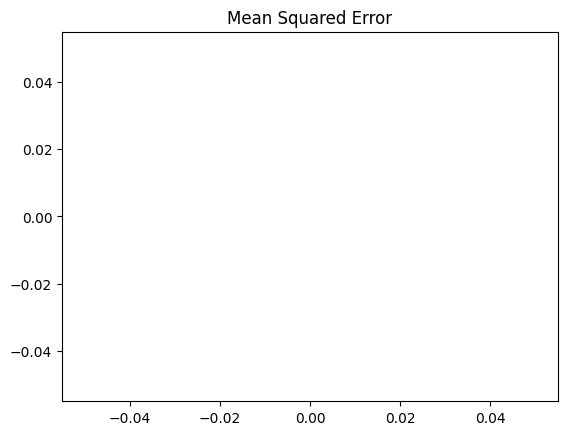

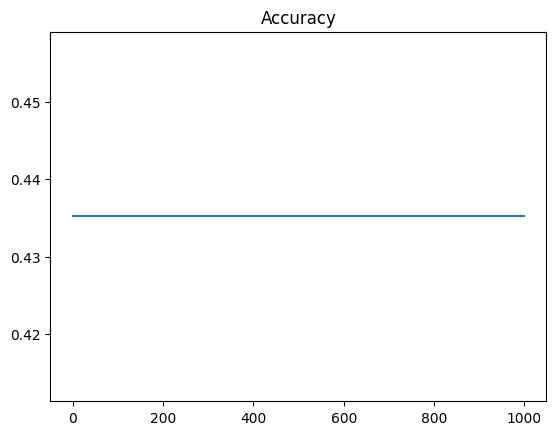

In [98]:
results.mse.plot(title="Mean Squared Error")
plt.show()
results.accuracy.plot(title="Accuracy")
plt.show()

###Now we will calculate the accuracy of the model.



In [99]:
# Test the model
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
test_acc = accuracy(np.eye(output_size)[y_test], A2)
print("Test accuracy: {}".format(test_acc))


Test accuracy: 0.55


#**Well Done :)**